# Wine Quality Prediction

## 1. Importing Necessary Libraries

In [1]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")

## 3. Exploratory Data Analysis

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2057,white,6.7,0.310,0.31,4.9,0.031,20.0,151.0,0.99260,3.36,0.82,12.0,7
2710,white,7.8,0.250,0.34,13.7,0.044,66.0,184.0,0.99976,3.22,0.75,8.9,5
5435,red,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6
5695,red,9.3,0.370,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7
5118,red,7.8,0.340,0.37,2.0,0.082,24.0,58.0,0.99640,3.34,0.59,9.4,6


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

**We must fill the null values**

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
abs(df.corr()["quality"]).sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265953
chlorides               0.200886
citric acid             0.085706
fixed acidity           0.077031
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038729
residual sugar          0.036825
pH                      0.019366
Name: quality, dtype: float64

In [8]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## 4. Data Visualization

<AxesSubplot:xlabel='type', ylabel='quality'>

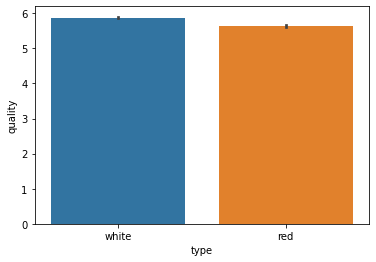

In [9]:
sns.barplot(x = "type", y = "quality", data = df)

**The means of white and red wine are quite similar**

### We are looking the histogram of every feature

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

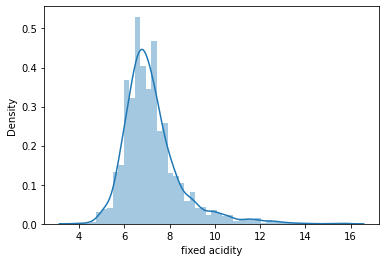

In [10]:
sns.distplot(df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

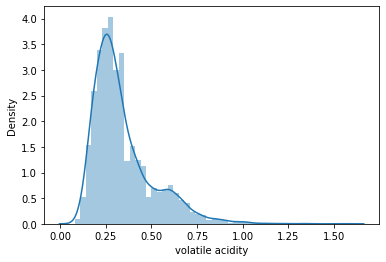

In [11]:
sns.distplot(df["volatile acidity"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

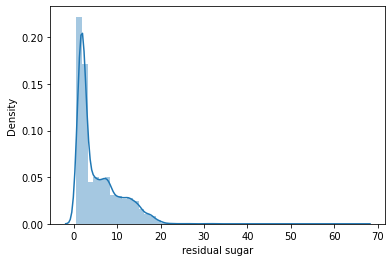

In [12]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

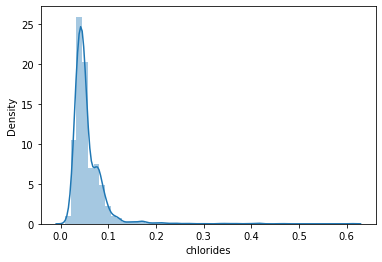

In [13]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

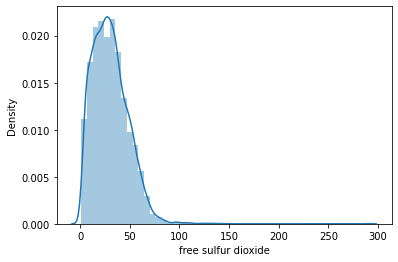

In [14]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

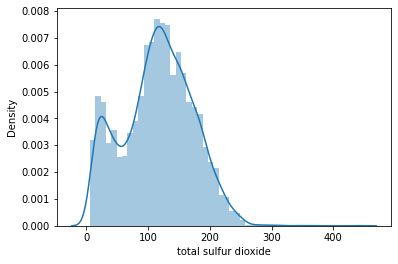

In [15]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='Density'>

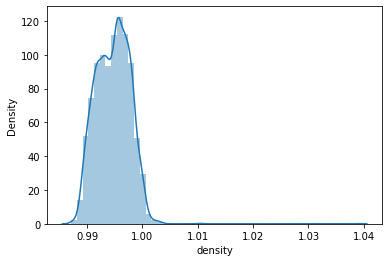

In [16]:
sns.distplot(df["density"])

<AxesSubplot:xlabel='pH', ylabel='Density'>

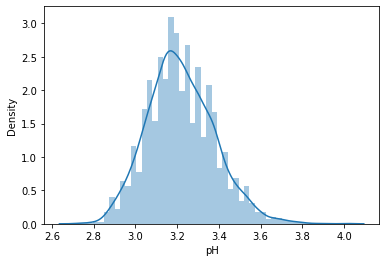

In [17]:
sns.distplot(df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

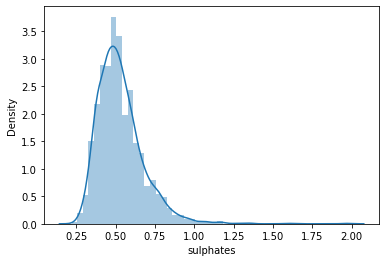

In [18]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

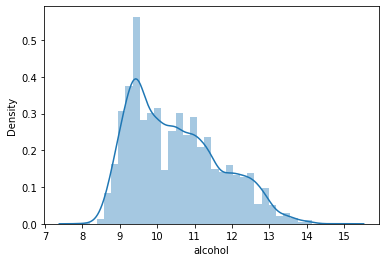

In [19]:
sns.distplot(df["alcohol"])

In [20]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## 5. Feature Engineering

**We first fill the null values then we replace the quality with low, medium and high**

In [21]:
df["fixed acidity"] = df.groupby("type")["fixed acidity"].transform(lambda x: x.fillna(x.median()))

df["volatile acidity"] = df.groupby("type")["volatile acidity"].transform(lambda x: x.fillna(x.median()))

df["citric acid"] = df.groupby("type")["citric acid"].transform(lambda x: x.fillna(x.median()))

df["residual sugar"] = df.groupby("type")["residual sugar"].transform(lambda x: x.fillna(x.median()))

df["chlorides"] = df.groupby("type")["chlorides"].transform(lambda x: x.fillna(x.median()))

df["pH"] = df.groupby("type")["pH"].transform(lambda x: x.fillna(x.median()))

df["sulphates"] = df.groupby("type")["sulphates"].transform(lambda x: x.fillna(x.median()))



df["quality"] = df["quality"].replace({3:"low", 4:"low", 5:"medium", 6:"medium", 7:"medium", 8:"high", 9:"high"})

df["quality"] = df["quality"].replace({"low": 0, "medium": 1, "high": 2})

In [22]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.62,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


**We apply dummy variable to convert string to number**

In [23]:
df = pd.get_dummies(df, drop_first = True)

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

**We determine x and y columns**

In [25]:
y = df["quality"]
x = df.drop("quality", axis = 1)

**We are scaling the data**

In [26]:
std = StandardScaler()
std.fit_transform(x)

array([[-0.16690731, -0.4231179 ,  0.2843011 , ..., -0.54597199,
        -1.41855821,  0.57136659],
       [-0.70711849, -0.24082568,  0.14658083, ..., -0.27709855,
        -0.83161516,  0.57136659],
       [ 0.68199598, -0.36235383,  0.55974164, ..., -0.61319035,
        -0.32852111,  0.57136659],
       ...,
       [-0.70711849,  1.03521982, -1.299482  , ...,  1.47057878,
         0.42611996, -1.75018984],
       [-1.0158106 ,  1.85553478, -1.36834214, ...,  1.20170534,
        -0.2446721 , -1.75018984],
       [-0.93863757, -0.18006161,  1.04176259, ...,  0.86561355,
         0.42611996, -1.75018984]])

## 6. Modeling and Predicting

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 13) # train_size = 0.8

**Here we are trying MultinomialNB, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, XGBClassifier.**

### Multinomial Naive Bayes Classifier

In [28]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
pred_MNB = MNB.predict(x_test)

In [29]:
print(classification_report(pred_MNB, y_test))

              precision    recall  f1-score   support

           0       0.14      0.31      0.20        13
           1       0.98      0.94      0.96       635
           2       0.07      0.50      0.12         2

    accuracy                           0.93       650
   macro avg       0.40      0.58      0.42       650
weighted avg       0.96      0.93      0.94       650



In [30]:
confusion_matrix(pred_MNB, y_test)

array([[  4,   9,   0],
       [ 24, 597,  14],
       [  0,   1,   1]])

### K Neighbors Classifier

In [31]:
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
pred_KNC = KNC.predict(x_test)

In [32]:
print(classification_report(pred_KNC, y_test))

              precision    recall  f1-score   support

           0       0.11      1.00      0.19         3
           1       1.00      0.94      0.97       644
           2       0.13      0.67      0.22         3

    accuracy                           0.94       650
   macro avg       0.41      0.87      0.46       650
weighted avg       0.99      0.94      0.96       650



In [33]:
confusion_matrix(pred_KNC, y_test)

array([[  3,   0,   0],
       [ 25, 606,  13],
       [  0,   1,   2]])

### Support Vector Machine Classifier

In [34]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred_SVC = SVC.predict(x_test)

In [35]:
print(classification_report(pred_SVC, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.97       650
           2       0.00      0.00      0.00         0

    accuracy                           0.93       650
   macro avg       0.33      0.31      0.32       650
weighted avg       1.00      0.93      0.97       650



In [36]:
confusion_matrix(pred_SVC, y_test)

array([[  0,   0,   0],
       [ 28, 607,  15],
       [  0,   0,   0]])

### Decision Tree Classifier

In [37]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)

In [38]:
print(classification_report(pred_DTC, y_test))

              precision    recall  f1-score   support

           0       0.18      0.19      0.19        26
           1       0.94      0.95      0.94       601
           2       0.47      0.30      0.37        23

    accuracy                           0.90       650
   macro avg       0.53      0.48      0.50       650
weighted avg       0.89      0.90      0.89       650



In [39]:
confusion_matrix(pred_DTC, y_test)

array([[  5,  21,   0],
       [ 23, 570,   8],
       [  0,  16,   7]])

### Random Forest Classifier

In [40]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)

In [41]:
print(classification_report(pred_RFC, y_test))

              precision    recall  f1-score   support

           0       0.07      0.67      0.13         3
           1       1.00      0.94      0.97       641
           2       0.33      0.83      0.48         6

    accuracy                           0.94       650
   macro avg       0.47      0.81      0.52       650
weighted avg       0.99      0.94      0.96       650



In [42]:
confusion_matrix(pred_RFC, y_test)

array([[  2,   1,   0],
       [ 26, 605,  10],
       [  0,   1,   5]])

### Gradient Boosting Classifier

In [43]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
pred_GBC = GBC.predict(x_test)

In [44]:
print(classification_report(pred_GBC, y_test))

              precision    recall  f1-score   support

           0       0.11      0.60      0.18         5
           1       0.99      0.94      0.97       642
           2       0.07      0.33      0.11         3

    accuracy                           0.93       650
   macro avg       0.39      0.62      0.42       650
weighted avg       0.98      0.93      0.96       650



In [45]:
confusion_matrix(pred_GBC, y_test)

array([[  3,   2,   0],
       [ 25, 603,  14],
       [  0,   2,   1]])

### Extreme Gradient Boosting Classifier

In [46]:
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)

[16:09:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print(classification_report(pred_XGBC, y_test))

              precision    recall  f1-score   support

           0       0.14      0.57      0.23         7
           1       0.99      0.95      0.97       632
           2       0.47      0.64      0.54        11

    accuracy                           0.94       650
   macro avg       0.53      0.72      0.58       650
weighted avg       0.97      0.94      0.95       650



In [48]:
confusion_matrix(pred_XGBC, y_test)

array([[  4,   3,   0],
       [ 24, 600,   8],
       [  0,   4,   7]])